In [56]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy.stats import ttest_ind
import pingouin as pg
from scipy import stats
%matplotlib inline

In [54]:
def teste_normalidade(x):
    # Plotting the histogram with KDE line
    plt.subplot(1, 2, 1)
    plt.rcParams["figure.figsize"] = (8, 4)
    ax = sns.histplot(x, kde=True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('gray')
    ax.tick_params(axis='x', width=0.5, color='gray')
    ax.tick_params(axis='y', width=0.5, color='gray')

    # Plotting the QQ-plot
    plt.subplot(1, 2, 2)
    pg.qqplot(x, dist='norm')
    
    # Calculating skewness and kurtosis
    print('Sample size:', len(x))
    print('Skewness:', stats.skew(x), '(The farther from zero, the less normal)')
    print('Kurtosis:', stats.kurtosis(x))

    # Shapiro-Wilk test (may not work well with many identical values)
    W, p = stats.shapiro(x)
    print('Shapiro-Wilk: W={0}, p={1}'.format(W, p), '(if p > 0.05, it is normal)')

    # Kolmogorov-Smirnov test
    D, p = stats.kstest(x, cdf='norm', args=(x.mean(), x.std()), N=len(x))
    print('Kolmogorov-Smirnov: D={0}, p={1}'.format(D, p), '(if p > 0.05, it is normal)')

    # Anderson-Darling test
    ad_stat, ad_critical, ad_theoretical = stats.anderson(x, dist='norm')
    print('Anderson-Darling: T={0}, p(0.05)={1}'.format(ad_stat, ad_critical[2]), '(if p > 0.05, it is normal)')
    print('Anderson-Darling critical values:', ad_critical)
    print('Anderson-Darling percentages:', ad_theoretical)

In [43]:
df = pd.read_csv("data/dapi_results.tsv", sep='\t')

In [44]:
df

,,Label,Area,Mean,Mode,Min,Max,IntDen,Median,RawIntDen,Group
0,1,d2-dox-h2ax-647-dnapk-564-fak-488-dapi-01_Out_...,211.368,4609.158,0,0,30417,974227.119,3695,9.371617e+08,1
1,2,d2-dox-h2ax-647-dnapk-564-fak-488-dapi-01_Out_...,8.160,2546.996,0,0,18800,20784.694,1416,1.999392e+07,4
2,3,d2-dox-h2ax-647-dnapk-564-fak-488-dapi-01_Out_...,203.207,4691.971,0,0,30417,953442.426,3799,9.171678e+08,5
3,4,d2-dox-h2ax-647-dnapk-564-fak-488-dapi-02_Out_...,254.412,1426.538,0,0,10500,362929.002,1128,3.491210e+08,1
4,5,d2-dox-h2ax-647-dnapk-564-fak-488-dapi-02_Out_...,13.079,1107.758,0,0,6923,14487.904,787,1.393670e+07,4
5,6,d2-dox-h2ax-647-dnapk-564-fak-488-dapi-02_Out_...,241.334,1443.814,0,0,10500,348441.097,1148,3.351843e+08,5
6,7,d2-dox-h2ax-647-dnapk-564-fak-488-dapi-02_Out_...,339.283,1045.028,0,0,9794,354560.482,782,3.410709e+08,1
7,8,d2-dox-h2ax-647-dnapk-564-fak-488-dapi-02_Out_...,16.061,1010.799,0,0,7681,16234.497,701,1.561684e+07,4
8,9,d2-dox-h2ax-647-dnapk-564-fak-488-dapi-02_Out_...,323.222,1046.728,0,0,9794,338325.985,785,3.254540e+08,5
9,10,d2-dox-h2ax-647-dnapk-564-fak-488-dapi-02_Out_...,239.996,1313.631,0,0,10515,315266.008,977,3.032714e+08,1


In [45]:
map_dict = {
    1: "nucleus",
    4: "combine",
    5: 'nucleus less combine'
}

df['Group'] = df['Group'].map(map_dict)

In [46]:
df_mean = df.groupby('Group').describe()['Mean']

In [47]:
df_mean

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
combine,12.0,2449.613000,1565.098104,596.135,941.95050,2863.9225,3479.65725,5052.856
nucleus,12.0,4042.677167,2493.605104,1045.028,1398.31125,4804.4435,6264.99725,7531.286
nucleus less combine,12.0,4140.892583,2578.171819,1046.728,1420.21600,4844.4095,6465.43250,7802.166


<Axes: >

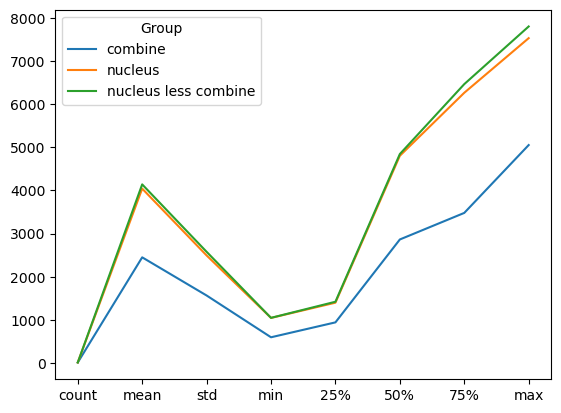

In [38]:
df_mean.transpose().plot()

<Axes: title={'center': 'Mean'}, xlabel='Group'>

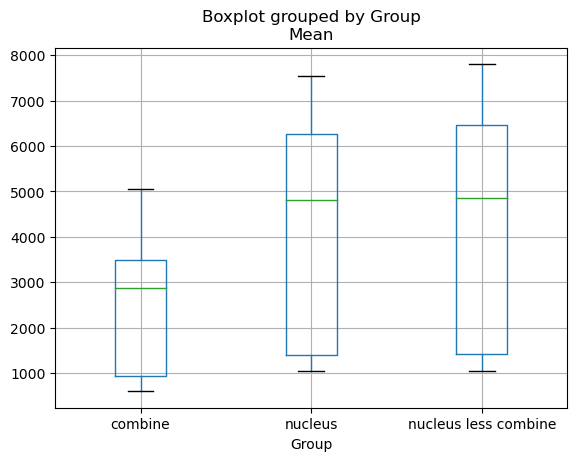

In [37]:
df.boxplot(column="Mean", by='Group')

In [48]:
combine_data = df[df['Group']== 'combine']['Mean']
nucleus_data =  df[df['Group']== 'nucleus']['Mean']
nuc_less_comb_data =  df[df['Group']== 'nucleus less combine']['Mean']

In [66]:
combine_data

1     2546.996
4     1107.758
7     1010.799
10     735.405
13    3365.627
16    3435.273
19    3180.849
22    4136.744
25    3612.810
28     614.104
31    5052.856
34     596.135
Name: Mean, dtype: float64

In [65]:
nuc_less_comb_data

2     4691.971
5     1443.814
8     1046.728
11    1349.422
14    5709.973
17    6497.609
20    6698.050
23    6454.707
26    7802.166
29    1795.018
32    4996.848
35    1204.405
Name: Mean, dtype: float64

# Teste de normalidade

Sample size: 12
Skewness: 0.0780844921484883 (The farther from zero, the less normal)
Kurtosis: -1.3949664498264382
Shapiro-Wilk: W=0.8908016085624695, p=0.12067815661430359 (if p > 0.05, it is normal)
Kolmogorov-Smirnov: D=0.221044126854408, p=0.5296234040385897 (if p > 0.05, it is normal)
Anderson-Darling: T=0.5784859860645799, p(0.05)=0.679 (if p > 0.05, it is normal)
Anderson-Darling critical values: [0.497 0.566 0.679 0.792 0.942]
Anderson-Darling percentages: [15.  10.   5.   2.5  1. ]


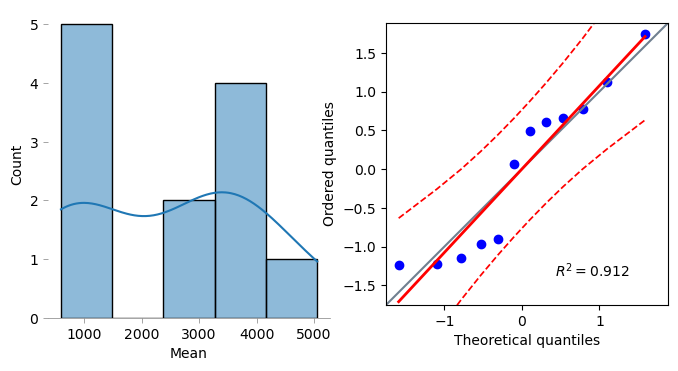

In [57]:
teste_normalidade(combine_data)

Sample size: 12
Skewness: -0.09458873495916428 (The farther from zero, the less normal)
Kurtosis: -1.6713898654480408
Shapiro-Wilk: W=0.8494744300842285, p=0.03616867586970329 (if p > 0.05, it is normal)
Kolmogorov-Smirnov: D=0.2359426315722284, p=0.44802783725312334 (if p > 0.05, it is normal)
Anderson-Darling: T=0.7859999454869993, p(0.05)=0.679 (if p > 0.05, it is normal)
Anderson-Darling critical values: [0.497 0.566 0.679 0.792 0.942]
Anderson-Darling percentages: [15.  10.   5.   2.5  1. ]


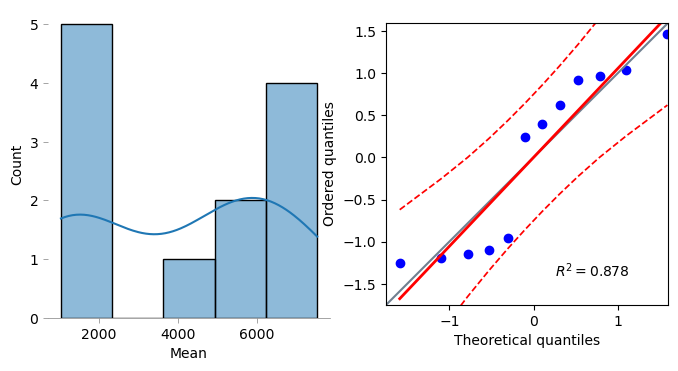

In [58]:
teste_normalidade(nucleus_data)

Sample size: 12
Skewness: -0.0736363632711448 (The farther from zero, the less normal)
Kurtosis: -1.6563857684129395
Shapiro-Wilk: W=0.8535150289535522, p=0.04058200120925903 (if p > 0.05, it is normal)
Kolmogorov-Smirnov: D=0.23522863723946758, p=0.45177612301475933 (if p > 0.05, it is normal)
Anderson-Darling: T=0.7634557282576093, p(0.05)=0.679 (if p > 0.05, it is normal)
Anderson-Darling critical values: [0.497 0.566 0.679 0.792 0.942]
Anderson-Darling percentages: [15.  10.   5.   2.5  1. ]


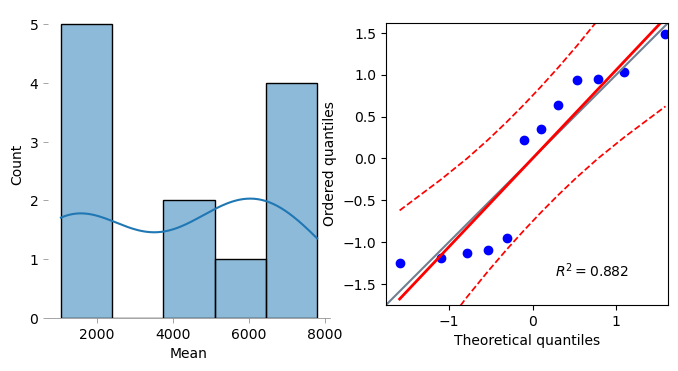

In [67]:
teste_normalidade(nuc_less_comb_data)

# Teste para distribuições não normais

In [68]:
from scipy.stats import mannwhitneyu

def mwu_test(controle, tratamento):
    stat, p = stats.mannwhitneyu(controle, tratamento)
    print('t=%.3f, p=%.5f' % (stat, p))
    if p <= 0.0001:
        return "****"
    elif p <= 0.001:
        return "***"
    elif p <= 0.01:
        return "**"
    elif p <= 0.05:
        return "*"
    return "NS"


In [71]:
mwu_test(combine_data, nuc_less_comb_data)

t=38.000, p=0.05310


'NS'

# Grafico

[2449.613, 4042.6771666666664]
t=-1.874, p=0.07421
NS


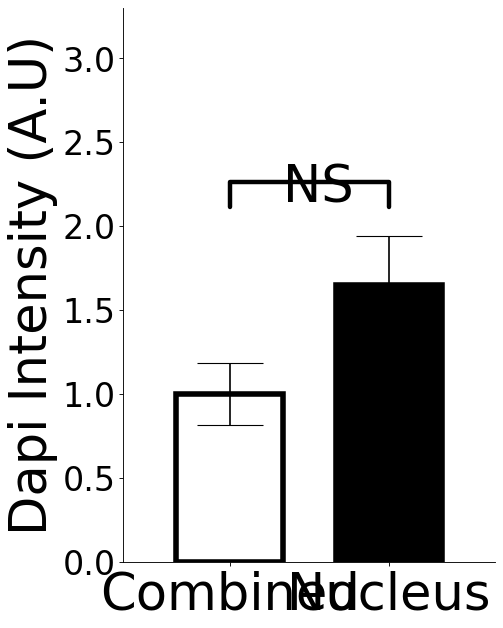

In [70]:
# Dados ######################################### ct dmso x dox dmso (fak)

ttest_group = [combine_data, nucleus_data]#grupo onde tem todos os dados que serão calculados o ttest
means =  [combine_data.mean(), nucleus_data.mean()] #grupo onde tem as informações da médias
erro = [combine_data.sem(), nucleus_data.sem()] #grupo que contem a informação dos erros

cor_ct = 'white'              #cor do grupo controle (barra1)
cor_dox = 'black'              #cor do grupo dox (barra2)

Nome_imagem_pdf = 'fakcluster_dapi_intensity.pdf' # nome da imagem salva em .pdf
Nome_imagem_jpeg = 'fakcluster_dapi_intensity.jpeg' # nome da imagem salva em .jpeg

cor_envolta = "black" #cor da linha envolta das barras
espessura_volta = 5   #espessura da linha envolta das barras
tamanho_barra_erro = 30           #tamanho da barra horizontal de erro

# coisas relacionadas ao eixo Y
Eixo_Y = 'Dapi Intensity (A.U)' # O que vai aparecer escrito no eixo Y
Tamanho_label_Y = 46 # Tamanho do texto do eixo Y
Tamanho_ticks_Y = 30 # Tamanho dos números que aparecem no eixo Y

# coisas relacionadas ao eixo X
labels = ['Combined', 'Nucleus'] #o que vai aparecer embaixo das barras, no eixo X.
Tamanho_label_X = 46 # Tamanho do texto do eixo X

print(means)

# normalização ######################################### 
# essa parte serve para criar um gráfico que visivelmente fica mais fácil ver quantas vezes ficou maior o grupo tratado (barra 2) do controle (barra 1)
# caso não quiser isso, é só comentar todas essa parte ou apagar

erro_ct = erro[0]/means[0]
erro_dox = erro[1]/means[0]
erro = [erro_ct,erro_dox]

ct_norm = means[0]/means[0]
dox_norm = means[1]/means[0]
means = [ct_norm, dox_norm]

# p #########################################
# essa parte é uma função que pega as datas dos dois grupos e faz um teste estatístico t de studant para ver se é uma variação significativa ou não e quanto significativa.
# aparece em asterístico automaticamente no gráfico

stat, p = ttest_ind(ttest_group[0], ttest_group[1])
print('t=%.3f, p=%.5f' % (stat, p))

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "NS"

pValue = convert_pvalue_to_asterisks(p)
print(convert_pvalue_to_asterisks(p))

# plotar traço #########################################
# essa parte serve para criar aquela barra encima do das duas barras
# agradecimentos para Sofia que me mostrou isso pela primeira vez e onde achou
# agradecimento ao Bruno que é o melhor programador que conheço e me ajudou.


def traco(text,X,Y):
    x = (X[0]+X[1])/2
    y = 1.2* max(Y[0], Y[1]) #caso o traço esteja no lugar errado, é aqui onde arruma, no valor antes da multiplicação
    dx = abs(X[0]-X[1])
    yp = y 
    xp = x-.005 # caso você achar que o asterísco não esta no lugar certo, altere o valor que é subtraido do x até que ele apareça onde é desejado
       
    props = {'connectionstyle':'bar','arrowstyle':'-',\
            'shrinkA':20,'shrinkB':20,'linewidth':4,'color':"black"}
    ax.annotate(text,fontsize =46, xy=(xp,yp+0.1*max(means)), zorder=10,color="#000000")
    ax.annotate('', xy=(X[0],y), xytext=(X[1],y), arrowprops=props)

# gráfico #########################################
x = [.045,.075]  # localização da barra
width = 0.02# espessura da barra

fig, ax = plt.subplots(figsize=(6,9), dpi=80)
barra_controle = ax.bar(x[0], means[0], yerr=erro[0], capsize= tamanho_barra_erro, width= width, color= cor_ct ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[0])
barra_doxo =  ax.bar(x[1], means[1], yerr=erro[1], capsize= tamanho_barra_erro, width= width ,color= cor_dox ,edgecolor= cor_envolta, linewidth= espessura_volta, label= labels[1])
traco(pValue,x,means)
#rects = ax.patches

# Os números em cima das barras #########################################
#label = ["%.2f"%item for item in means] # essa parte de "%.2f"% é para aparecer o numero em float, se trocar pra i, é inteiro
#for rect, label in zip(rects, label):
    #height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width() / 2, height+0.2*max(means), label,
    #        ha='center', va='bottom')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(Eixo_Y,fontsize=Tamanho_label_Y)
#ax.set_title('média de FAK no núcleo - 24h doxo',fontsize=16, pad = 20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=Tamanho_label_X)
# plt.ylim(0, 1.6* max(means))
plt.ylim(0,2* max(means))
plt.xlim((x[0]-.02),(x[1])+.02)
#plt.legend(prop={"size":15},loc="upper left")
plt.yticks(fontsize=Tamanho_ticks_Y)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig(Nome_imagem_pdf,bbox_inches='tight') # a parte do bbox_inches='tight' é que faz o tamanho ficar correto
plt.savefig(Nome_imagem_jpeg,bbox_inches='tight')

plt.show()